In [1]:
import sys
import os
my_path = os.path.dirname(os.getcwd())  # '/home/ellismith/OlfactoryBulb'
sys.path.append(my_path)

from prev_ob_models.Birgiolas2020.fitting import *
from prev_ob_models.Birgiolas2020.isolated_cells import *
from prev_ob_models.Birgiolas2020.Mechanisms import *

import neuronunit
import neuronunit.tests.base
from neuron.units import mV, ms, µm
from neuron import h, gui, load_mechanisms

import matplotlib.pyplot as plt

Import of eden.EdenBackend failed due to:
No module named 'eden_simulator'


--No graphics will be displayed.


In [2]:
# setup
# h.cvode_active(0)
# delay = 200
# dur   = 700
# h.tstop = 1000
# h.celsius = 35
# h.steps_per_ms = 20   # can increase this value for better temporal resolution
# h.dt = 1.0 / h.steps_per_ms

load_mechanisms("%s/prev_ob_models/Birgiolas2020/Mechanisms"%my_path)

my_cell = 'GC1'
neuron_path = "%s/prev_ob_models/Birgiolas2020/Cells/%s.hoc"% (my_path, my_cell)
h.load_file(neuron_path)

h.cvode_active(0)
delay = 200
dur   = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 20   # can increase this value for better temporal resolution
h.dt = 1.0 / h.steps_per_ms

cell = getattr(h, my_cell)()

for sec in h.allsec():
    print(sec)

h.topology()

GC1[0].soma
GC1[0].apic[0]
GC1[0].apic[1]
GC1[0].apic[2]
GC1[0].apic[3]
GC1[0].apic[4]
GC1[0].apic[5]
GC1[0].apic[6]
GC1[0].apic[7]
GC1[0].apic[8]
GC1[0].apic[9]
GC1[0].apic[10]

|-|       GC1[0].soma(0-1)
  `----|       GC1[0].apic[0](0-1)
        `|       GC1[0].apic[1](0-1)
          `--|       GC1[0].apic[2](0-1)
          `|       GC1[0].apic[3](0-1)
            `--|       GC1[0].apic[4](0-1)
            `--|       GC1[0].apic[5](0-1)
        `|       GC1[0].apic[6](0-1)
          `|       GC1[0].apic[7](0-1)
            `--|       GC1[0].apic[8](0-1)
            `--|       GC1[0].apic[9](0-1)
          `|       GC1[0].apic[10](0-1)



1.0

In [15]:
iclamp = h.IClamp(cell.soma(0.5))
iclamp.delay = delay
iclamp.dur = dur
iclamp.amp = 0.06

t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma(0.5)._ref_v)

In [16]:
h.finitialize(-65 * mV)
h.continuerun(1000 * ms)

0.0

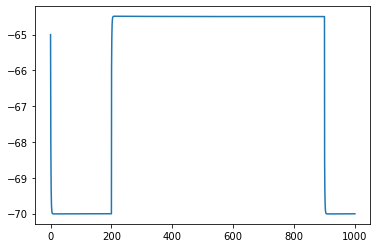

In [17]:
plt.plot(t, v)